# Pengenalan Quick Response 

## 1. Kompetensi

Mahasiswa mampu membuat, memindai, dan mengestrak informasi dari Quick Respon dengan OpenCV.

## 2. Sub Kompetensi

•	Dapat melaukan pemrograman dengan Jupyter Notebook.

•	Dapat melakukan pemrograman membuat QR Code.

•	Dapat melakukan ekstrasi informasi pada QR Code.

## 3. Dasar Teori

### a. Python

**Python** adalah bahasa pemrograman interpretatif multiguna. Tidak seperti bahasa lain yang susah untuk dibaca dan dipahami, Python lebih menekankan pada keterbacaan kode agar lebih mudah untuk memahami sintaks. Hal ini membuat Python sangat mudah dipelajari baik untuk pemula maupun untuk yang sudah menguasai bahasa pemrograman lain.
Bahasa ini muncul pertama kali pada tahun 1991, dirancang oleh seorang bernama Guido van Rossum. Sampai saat ini Python masih dikembangkan oleh Python Software Foundation. Bahasa Python mendukung hampir semua sistem operasi, bahkan untuk sistem operasi Linux, hampir semua distronya sudah menyertakan Python di dalamnya.
Dengan kode yang simpel dan mudah diimplementasikan, seorang programmer dapat lebih mengutamakan pengembangan aplikasi yang dibuat, bukan malah sibuk mencari syntax error.

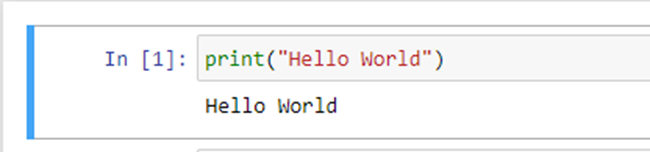

Hanya dengan menuliskan kode print seperti yang diatas, anda sudah bisa mencetak apapun yang anda inginkan di dalam tanda kurung (). Dibagian akhir kode pun, anda tidak harus mengakhirnya dengan tanda semicolon (;).

### b. OpenCV

**OpenCV** adalah library/packages khusus dalam bahasa pemrograman Python, yang secara eksklusif diperlukan untuk sistem untuk menjalankan deskripsi fitur SURF di samping modul OpenCV di library open-source.
OpenCV-contrib sama dengan librabry OpenCV pada umumnya yang fungsi utamnya untuk memanipluasi frame gambar/video lebih sering disebut Computer Vision, namun untuk library tersebut terdapat penambahan feature-feature. Nantinya feature-feature tersebut digunakan pada labsheet-labsheet selanjutnya tentang Aruco Marker.


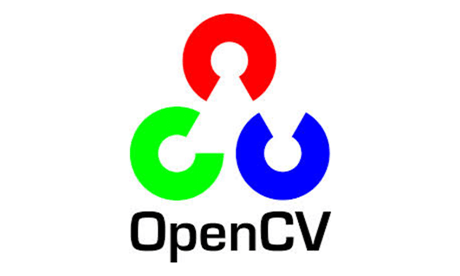

### c. Jupyter Notebook

**Jupyter Notebook** adalah aplikasi web gratis untuk yang digunakan untuk membuat dan membagikan dokumen yang memiliki kode, hasil hitungan, visualisasi, dan teks. Jupyter adalah singkatan dari tiga bahasa pemrograman Julia (Ju), Python (Py), dan R. Tiga bahasa pemrograman ini adalah sesuatu yang penting bagi seorang data scientist.

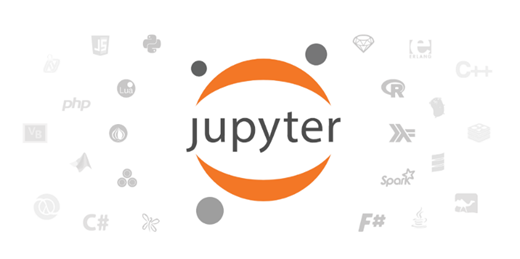

Jupyter berfungsi untuk membantu kamu dalam membuat narasi komputasi yang menjelaskan makna dari data di dalamnya dan memberikan insight mengenai data tersebut. Selain itu, Jupyter juga mempermudah kerja sama antara insinyur dan data scientist karena kemudahannya dalam menulis dan berbagi teks dan kode.

### d. Quick Responce Code (QR Code)

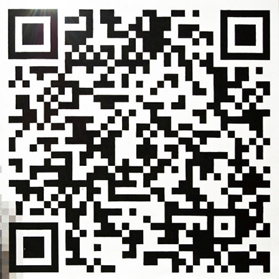

**QR Code** atau singkatan dari Quick Response adalah sebuah gambar dalam bentuk matriks dua dimensi di mana data dapat disimpan. Popularitas QR Code berkembang pesat di seluruh dunia. Saat ini, ponsel dengan kamera bawaan banyak digunakan untuk mengenali QR Code. QR Code bisa digunakan dalam berbagai hal dalam hal menyimpan informasi, seperti contoh ketika ingin mengakses suatu website kita tidak perlu mengetikan alamat url website tersebut melainkan bisa dengan cukup melakukan scan maka selanjutnya smartphone/scanner akan langsung menampilkan alamat url yang berada pada QR Code tersebut

## Langkah-Langkah Pemrograman

## Import Library

In [15]:
import cv2 as cv
import numpy as np
import qrcode
import pandas as pd
import glob
import pathlib
from pyzbar.pyzbar import decode

## Mengenerate QR Code berisi String

In [11]:
# Link for website

input_data = "https://uny.ac.id"

#Creating an instance of qrcode
qr = qrcode.QRCode(
        version=1,
        box_size=10,
        border=5)
qr.add_data(input_data)

qr.make(fit=True)
img = qr.make_image(fill='black', back_color='white')
img.save('qrcode001.png')

## Membuat Function Decoder QR Code

In [4]:
def decoder(image):
    gray_img = cv2.cvtColor(image,0)
    barcode = decode(gray_img)

    for obj in barcode:
        points = obj.polygon
        (x,y,w,h) = obj.rect
        pts = np.array(points, np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(image, [pts], True, (0, 255, 0), 3)

        barcodeData = obj.data.decode("utf-8")
        barcodeType = obj.type
        string = "Data " + str(barcodeData) + " | Type " + str(barcodeType)
        
        cv2.putText(frame, string, (x,y), cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0), 2)
        print("Barcode: "+barcodeData +" | Type: "+barcodeType)

## Melakukan Scan QR Code

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    decoder(frame)
    cv2.imshow('Image', frame)
    code = cv2.waitKey(10)
    if code == ord('q'):
        break